<a href="https://colab.research.google.com/github/Marzban-io/knn-classifier-from-scratch/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-NN Classifier on Synthetic Dataset

In this project, I worked with a synthetic dataset (`Synthtetic.hdf5`) that includes labeled data for two classes. Each sample consists of two features and a corresponding class label.

### Objective

The goal was to implement a **k-nearest neighbors (k-NN)** classifier **from scratch** using only **NumPy** (no external ML libraries like scikit-learn). The classifier estimates the class probabilities for each test example based on its k nearest neighbors and predicts the label with the highest probability.

### Implementation Details

* Trained and evaluated a k-NN classifier for various values of **k**.
* Computed classification accuracy as the proportion of correctly classified examples:

  * On the **test set**.
  * On the **training set**, treating each training sample as a test sample (to help validate the implementation).
* Visualized accuracy vs. k using **matplotlib**:

  * One plot for test set accuracy.
  * One plot for training set accuracy.
* Analyzed the plots to **identify signs of overfitting and underfitting**.

> **Note:** This exercise does not use a separate validation set.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

(400, 3)
The accuracy of the implemented k-NN algorithm for training_dataset with k = 192 is 98.0%
The accuracy of the implemented k-NN algorithm for test_dataset with k = 192 is 96.0%
The optimal value for k in training dataset is 8, with the accuracy of 98.0
The optimal value for k in test dataset is 137, with the accuracy of 97.5


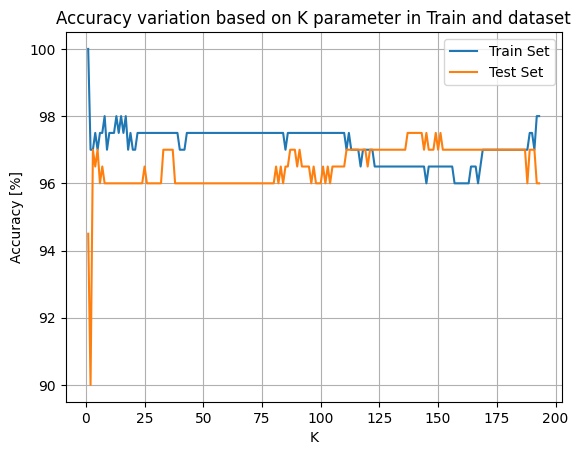

In [4]:
Dataset1 = h5py.File('/content/Synthtetic.hdf5')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]
print(Data.shape)

k=192

def Eucl_dist(point,Train_set,k):
    Vector_distances = []
    for i in range(0,len(Train_set)):
        x = Train_set[i,0]
        y = Train_set[i,1]
        classe = Train_set[i,2]
        vec_dist = [i,((point[0]-x)**2+(point[1]-y)**2)*0.5,classe]
        Vector_distances.append(vec_dist)
    vec_dist_array = np.array(Vector_distances)
    vec_dist_array_sort = np.argsort(vec_dist_array[:,1])
    vec_dist_sorted = vec_dist_array[vec_dist_array_sort]
    k_nearest_neighbor = vec_dist_sorted[0:k]
    return k_nearest_neighbor

def knn(Test_set,Train_set,k):
    lista_classi = []
    for Test_point in Test_set:
        E_dist = Eucl_dist(Test_point,Train_set,k)
        classi = E_dist[:,2]
        val = sum(classi)
        if val >= np.ceil(k/2):
            classe = 1
        else:
            classe = 0
        lista_classi.append([classe])
    return lista_classi

def accuracy(lista_classi,Test_Set):
    success = []
    for i in range(0,len(lista_classi)):
        estemated_class = lista_classi[i]
        actual_class = Test_Set[i,2]
        if estemated_class == actual_class:
            success.append(1)
        else:
            success.append(0)

    accuracy_value = sum(success)/len(success)*100
    return accuracy_value

output_Train = knn(Train_Set,Train_Set,k)
print(f'The accuracy of the implemented k-NN algorithm for training_dataset with k = {k} is {accuracy(output_Train,Train_Set)}%')

output_Test = knn(Test_Set,Train_Set,k)
print(f'The accuracy of the implemented k-NN algorithm for test_dataset with k = {k} is {accuracy(output_Test,Test_Set)}%')

def k_best(k_min, k_max,Train_set,Test_Set):
    k_vec = np.arange(k_min, k_max)
    accuracy_list = []
    k_opt_list = []
    acc_opt = 0

    for k in k_vec:
        output = knn(Test_Set,Train_set, k)
        accuracy_value = accuracy(output,Test_Set)
        accuracy_list.append(accuracy_value)

        if accuracy_value > acc_opt and k > 1:
            acc_opt = accuracy_value
            k_opt_list.append([k,acc_opt])

    return k_vec, accuracy_list, k_opt_list

k_max = 194
k_vec_Train,accuracy_Train,k_opt_Train = k_best(1,k_max,Train_Set,Train_Set)
k_vec_Test,accuracy_Test,k_opt_Test = k_best(1,k_max,Train_Set,Test_Set)

print(f'The optimal value for k in training dataset is {k_opt_Train[-1][0]}, with the accuracy of {k_opt_Train[-1][1]}')
print(f'The optimal value for k in test dataset is {k_opt_Test[-1][0]}, with the accuracy of {k_opt_Test[-1][1]}')

plt.figure()
plt.plot(k_vec_Train,accuracy_Train, label = 'Train Set')
plt.plot(k_vec_Test,accuracy_Test, label = 'Test Set')
plt.legend()
plt.title('Accuracy variation based on K parameter in Train and dataset')
plt.xlabel('K')
plt.ylabel('Accuracy [%]')
plt.grid()
plt.show()



##  Wine Quality Prediction

### Part 1: Classification with k-NN

In this part of the project, I explored a real-world dataset based on wine quality. The dataset includes 11 physicochemical features for each wine sample (e.g., pH, density, alcohol content), with a quality score (ranging from 1 to 10) as the target variable.

The dataset, originally introduced in the study *"Modeling wine preferences by data mining from physicochemical properties"* by P. Cortez et al., is available [here](https://archive.ics.uci.edu/ml/datasets/wine+quality). For this task, I used a subset containing 400 samples.

**Tasks performed:**

* Split the dataset into **training** and **test** sets (200 samples each).
* Treated the problem as a **classification task** and implemented a **k-nearest neighbors (k-NN)** classifier (only using NumPy).
* Predicted wine quality on the test set for different values of **k** and measured prediction accuracy.
* Created a **matplotlib plot** to visualize how accuracy changes with different values of k.
* Interpreted the results to identify **overfitting** and **underfitting** behaviors.

### Part 2: Regression with Linear Model

In the second part, I approached the wine quality prediction as a **regression task**.

**Tasks performed:**

* Applied **linear regression** using `sklearn.linear_model.LinearRegression`.
* Evaluated performance based on:

  * **Prediction accuracy**
  * **Mean Squared Error (MSE)** on the test set

This comparison between classification and regression approaches provided valuable insight into how problem framing impacts model performance and evaluation.


original dataset shape is:  (400, 12)
normilized dataset shape is:  (400, 11)
The accuracy of the implemented k-NN algorithm for training dataset with k = 14 is 62.50%
The accuracy of the implemented k-NN algorithm on the test dataset with k = 14 is 45.50%
The Best k for train dataset is: 1 with an accuracy of: 100.00%
The Best k for test dataset is: 37 with an accuracy of: 51.50%


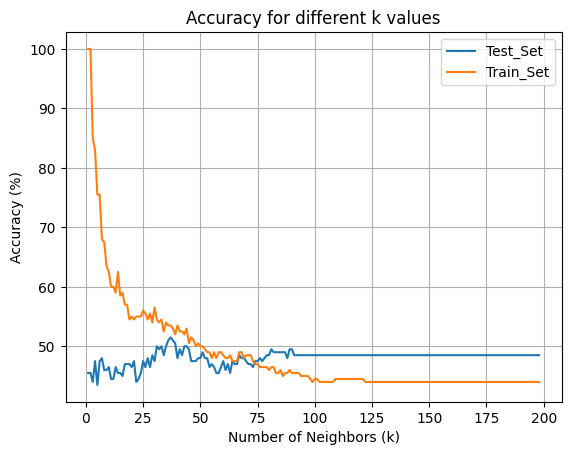

In [5]:
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

Dataset2 = h5py.File('/content/wine.hdf5')
Data1 = np.array(Dataset2.get('Dataset'))
print("original dataset shape is: ",Data1.shape)

scaler = MinMaxScaler()
normalized_matrix = scaler.fit_transform(Data1[:,:11])
Data =normalized_matrix
print("normilized dataset shape is: ",Data.shape)

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]

k=14

Train_x=Train_Set[:,:11]
Train_y=Data1[:200,11]
Test_x=Test_Set[:,:11]
Test_y=Data1[200:,11]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(train_x, train_y, test_x, k):
    predictions = []
    for test_point in test_x:
        distances = [euclidean_distance(test_point, train_point) for train_point in train_x]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [train_y[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
        predisctions_array=np.array(predictions)
    return predisctions_array

def accuracy(predicted_labels, true_labels):
    return np.mean(predicted_labels == true_labels) * 100

output_Train = knn_predict(Train_x, Train_y, Train_x, k)
train_accuracy = accuracy(output_Train, Train_y)
print(f'The accuracy of the implemented k-NN algorithm for training dataset with k = {k} is {train_accuracy:.2f}%')

output_Test = knn_predict(Train_x, Train_y, Test_x, k)
test_accuracy = accuracy(output_Test, Test_y)
print(f'The accuracy of the implemented k-NN algorithm on the test dataset with k = {k} is {test_accuracy:.2f}%')

k_values = range(1, 199)
test_acc = []
train_acc = []
for k in k_values:
    test_y_pred = knn_predict(Train_x, Train_y, Test_x, k)
    train_y_pred = knn_predict(Train_x, Train_y, Train_x, k)
    train_acc.append(accuracy(train_y_pred, Train_y))
    test_acc.append(accuracy(test_y_pred, Test_y))

best_test_k = k_values[np.argmax(test_acc)]
best_train_k = k_values[np.argmax(train_acc)]
print(f'The Best k for train dataset is: {best_train_k} with an accuracy of: {train_acc[np.argmax(train_acc)]:.2f}%')
print(f'The Best k for test dataset is: {best_test_k} with an accuracy of: {test_acc[np.argmax(test_acc)]:.2f}%')

plt.plot(k_values, test_acc, label ='Test_Set')
plt.plot(k_values,train_acc, label ='Train_Set')
plt.title('Accuracy for different k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.legend()
plt.show()

Mean Square Error: 0.65
R² Score (Accuracy): 0.25


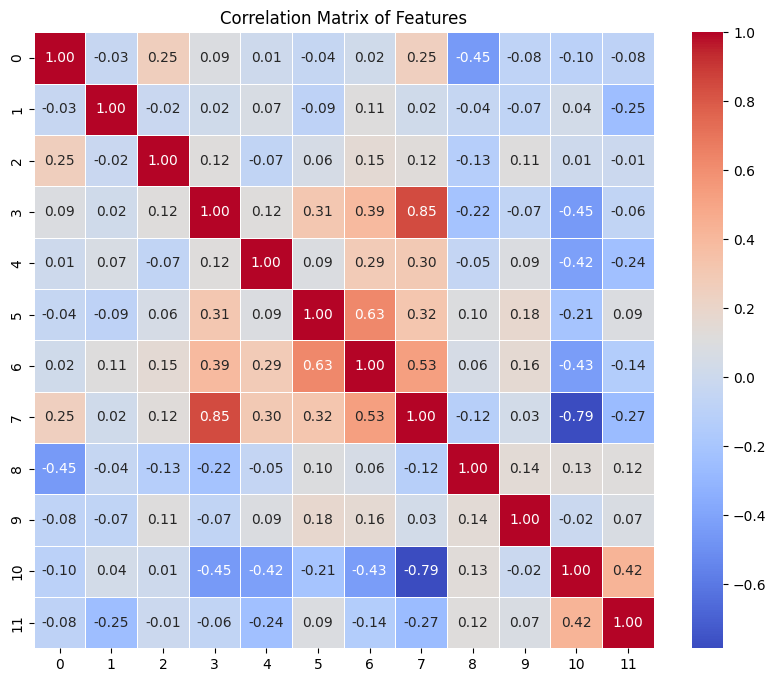

In [ ]:
#Part 2
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset2 = h5py.File('/content/wine.hdf5')
Data = np.array(Dataset2.get('Dataset'))

X = Data[:, :11]
y = Data[:, 11]

Train_x, Test_x, Train_y, Test_y = train_test_split(X, y, test_size=0.5)
model = LinearRegression()

model.fit(Train_x, Train_y)

y_pred = model.predict(Test_x)

mse = mean_squared_error(Test_y, y_pred)

r2 = r2_score(Test_y, y_pred)

print(f'Mean Square Error: {mse:.2f}')
print(f'R² Score (Accuracy): {r2:.2f}')

df = pd.DataFrame(Data)

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


## Phoneme Classification with k-NN

In this section, I worked with a subset of the [Phoneme dataset](https://catalog.ldc.upenn.edu/LDC93s1), which contains audio signal data collected at 16 kHz. Each data sample is represented by 256 values corresponding to waveform amplitudes. The task was to classify each sample into one of five phoneme classes: **"sh"**, **"iy"**, **"dcl"**, **"aa"**, or **"ao"**.

A subset of 400 samples was used for the experiment.

### Objectives:

* Split the dataset into **200 training samples** and **200 test samples**.
* Implement a **k-NN classifier** (built from scratch using NumPy) to predict phoneme labels for the test set.
* Evaluate and plot the **classification accuracy** across different values of **k** using **matplotlib**.
* Analyze the trend in accuracy to identify signs of **overfitting** and **underfitting** as k varies.


shape of original dataset is:  (400, 257)
shape of normilized dataset is:  (400, 256)
The accuracy of the implemented k-NN algorithm for training dataset with k = 20 is 88.00%
The accuracy of the implemented k-NN algorithm on the test dataset with k = 20 is 88.50%
The Best k for train dataset is: 1 with an accuracy of: 100.00%
The Best k for test dataset is: 5 with an accuracy of: 92.50%


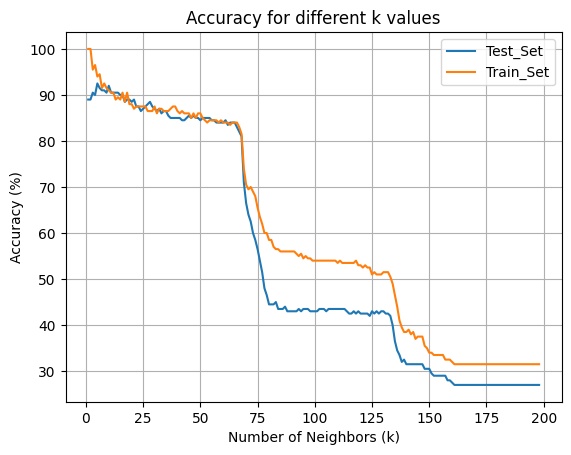

NameError: name 'sns' is not defined

<Figure size 1200x1000 with 0 Axes>

In [6]:
Dataset3 = h5py.File('/content/3.hdf5')
Data1 = np.array(Dataset3.get('Dataset'))
print("shape of original dataset is: ",Data1.shape)

scaler = MinMaxScaler()
normalized_matrix = scaler.fit_transform(Data1[:,:256])
Data =normalized_matrix
print("shape of normilized dataset is: ",Data.shape)

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]

k=20

Train_x=Train_Set[:,:256]
Train_y=Data1[:200,256]
Test_x=Test_Set[:,:256]
Test_y=Data1[200:,256]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(train_x, train_y, test_x, k):
    predictions = []
    for test_point in test_x:
        distances = [euclidean_distance(test_point, train_point) for train_point in train_x]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [train_y[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
        predisctions_array=np.array(predictions)
    return predisctions_array

def accuracy(predicted_labels, true_labels):
    return np.mean(predicted_labels == true_labels) * 100

output_Train = knn_predict(Train_x, Train_y, Train_x, k)
train_accuracy = accuracy(output_Train, Train_y)
print(f'The accuracy of the implemented k-NN algorithm for training dataset with k = {k} is {train_accuracy:.2f}%')

output_Test = knn_predict(Train_x, Train_y, Test_x, k)
test_accuracy = accuracy(output_Test, Test_y)
print(f'The accuracy of the implemented k-NN algorithm on the test dataset with k = {k} is {test_accuracy:.2f}%')

k_values = range(1, 199)
test_acc = []
train_acc = []
for k in k_values:
    test_y_pred = knn_predict(Train_x, Train_y, Test_x, k)
    train_y_pred = knn_predict(Train_x, Train_y, Train_x, k)
    train_acc.append(accuracy(train_y_pred, Train_y))
    test_acc.append(accuracy(test_y_pred, Test_y))

best_test_k = k_values[np.argmax(test_acc)]
best_train_k = k_values[np.argmax(train_acc)]
print(f'The Best k for train dataset is: {best_train_k} with an accuracy of: {train_acc[np.argmax(train_acc)]:.2f}%')
print(f'The Best k for test dataset is: {best_test_k} with an accuracy of: {test_acc[np.argmax(test_acc)]:.2f}%')

plt.plot(k_values, test_acc, label ='Test_Set')
plt.plot(k_values,train_acc, label ='Train_Set')
plt.title('Accuracy for different k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.legend()
plt.show()

correlation_matrix = np.corrcoef(Data, rowvar=False)

correlation_pairs = np.tril(correlation_matrix, -1)
sorted_pairs = np.abs(correlation_pairs).flatten()
sorted_indices = np.argsort(sorted_pairs)[-50:]

rows, cols = np.unravel_index(sorted_indices, correlation_matrix.shape)

top_feature_indices = list(set(rows).union(cols))

top_correlation_matrix = correlation_matrix[np.ix_(top_feature_indices, top_feature_indices)]

plt.figure(figsize=(12, 10))
sns.heatmap(top_correlation_matrix, annot=False, cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)
plt.show()